# R applications – Part I Some useful graphs
* 1.1 Log-log binary plots
* 1.2 Harker plots and closure effect
* 1.3 Spiderplots
* 1.4 Ternary plots

## 1.1 Log-log binary plots
Plotting a binary plot in logarithmic coordinates enables examining both the elemental concentrations and their ratios. In this projection the fan of lines passing through the origin corresponding to analyses of constant ratio in a standard binary plot is transformed into a series of parallel lines of identical slope in logarithmic coordinates. In R, log–log diagrams are plotted using the function `plot`, specifying `log = "xy"`.

<img src="images/exercise-icon.png" style="float:left;width:40px;height:40px;"> 
Plot binary diagrams of Sr vs. Rb for the `sazava` dataset in two versions, linear and log-log.

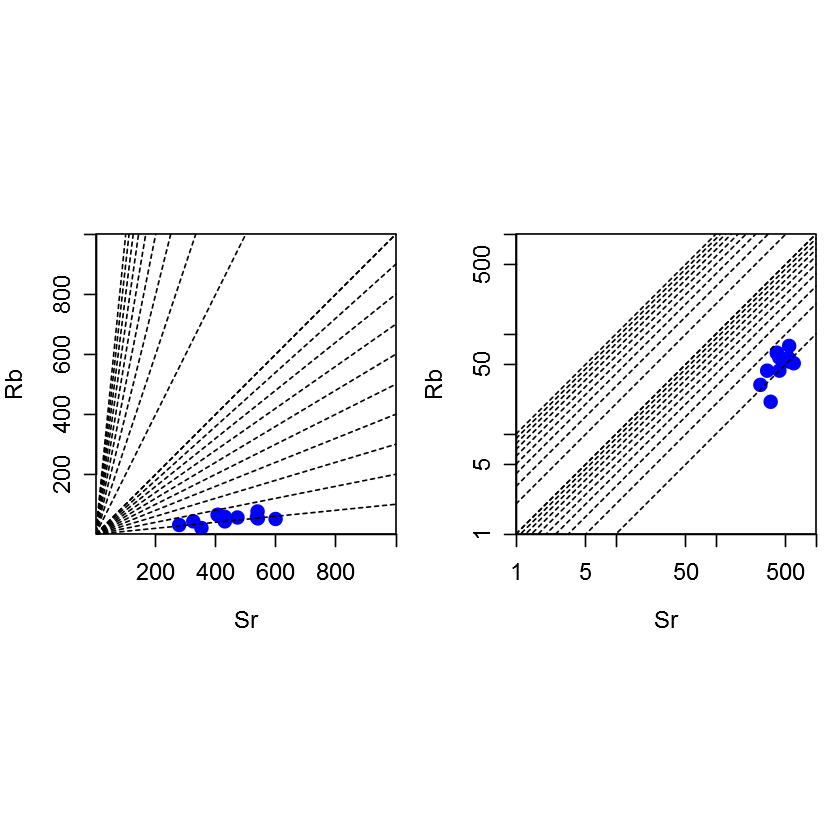

In [1]:
sazava <- read.table("data/sazava.data",sep="\t")
windows(width=10,height=5,pointsize=14) # empty window of correct size
par(mfrow=c(1,2))                       # split screen for two graphs
par(mar=c(4,4,1,1))                     # outer margins for each of the graphs
par(pty = "s")                          # forces the individual plots to be square
# Plot 1
plot(sazava[,"Sr"],sazava[,"Rb"],xlim=c(1,1000),ylim=c(1,1000),xlab="Sr",ylab="Rb",pch=16,col="blue",cex=1.5,xaxs="i",yaxs="i",log="")
ee <- sapply(c(seq(0.1,1,0.1),1:10),function(i)abline(0,i,lty="dashed"))

# Plot 2
plot(sazava[,"Sr"],sazava[,"Rb"],xlim=c(1,1000),ylim=c(1,1000),xlab="Sr",ylab="Rb",pch=16,col="blue",cex=1.5,xaxs="i",yaxs="i",log="xy")
ee <- sapply(c(seq(0.1,1,0.1),1:10),function(i)abline(log10(i),1,lty="dashed"))

### 1.2 Harker plots  and closure effect
One of the most useful, most commonly employed and at the same time most questioned graphs in igneous geochemistry are the Harker plots, i.e. binary plots of silica versus major-element oxides (Harker 1909). 

<img src="images/Harker.png" style="width:400px;">

Numerous workers have argued that much of correlation observed in binary plots involving silica is spurious, due to the constant sum effect (e.g., Chayes 1960; Skala 1979; Rock 1988; Rollinson 1992, 1993). This effect arises from the fact that major elements sum up to 100 % and thus, if one oxide increases in abundance, all others must decrease. Therefore, everything must be anti-correlated with silica. In any binary diagram (especially using SiO<sub>2</sub> which is the most abundant component), this results in formation of a “Forbidden zone”, into which no analyses could plot.

One solution to this problem has been proposed by Bonin (1986) who introduced the SiO<sub>2</sub> vs. oxide\* plots, where oxide\* represents the proportion of the relevant oxide in the non-silica portion of the rock (in wt. %)

<img src="images/closure.png" style="width:600px;">

*Derivation of an oxide*\* *diagram for the Sázava dataset. **a** Alumina plotted in wt. %. Note the “Forbidden zone”, approached by the trend as differentiation progresses, meaning that Al<sub>2</sub>O<sub>3</sub> becomes an increasingly important part of the “non-silica” portion of the rock. This is underlined by the sharp increase in Al<sub>2</sub>O<sub>3</sub> *(**b**)*

Another classic numerical remedy to the constant-sum problem are log-ratio transformations (Aitchison 1986). See Reimann et al. (2008) for details.

<img src="images/exercise-icon.png" style="float:left;width:40px;height:40px;"> 
Using a loop and function `par(mfrow)`, write a short program that would plot six binary plots of SiO<sub>2</sub> vs. major-element oxides of your choice.

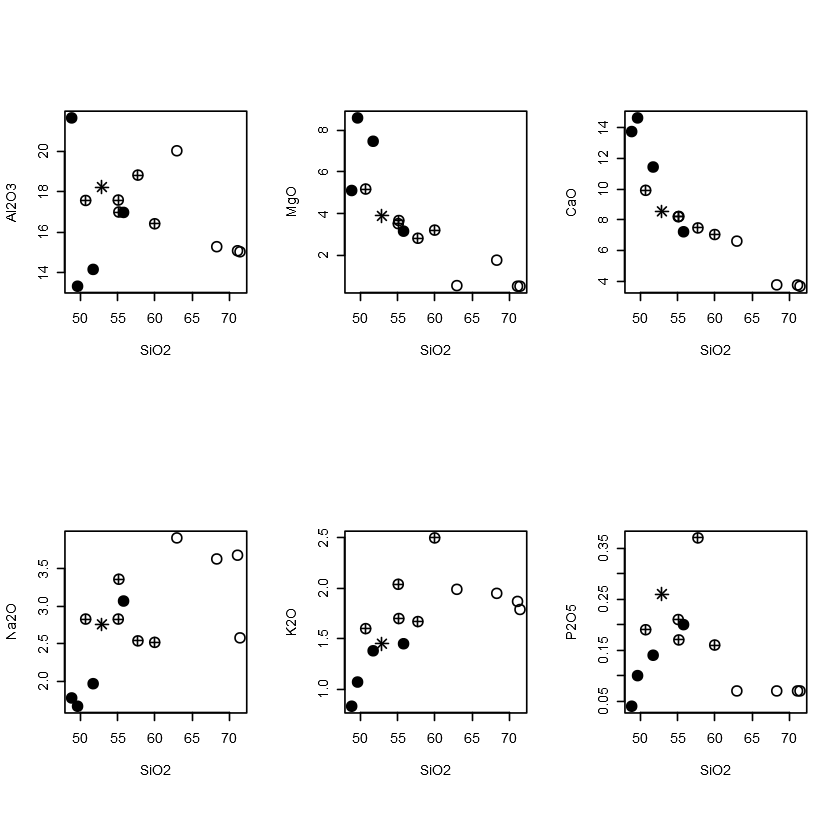

In [2]:
sazava <- read.table("data/sazava.data",sep="\t")
windows(width=8,height=6)
par(mfrow=c(2,3))	# Split screen for 6 graphs
ee <- c("Al2O3","MgO","CaO","Na2O","K2O","P2O5")
for(f in ee){
    par(pty = "s")
    plot(sazava[,"SiO2"],sazava[,f],xlab="SiO2",ylab=f,pch=sazava[,"Symbol"],cex=1.5)
}

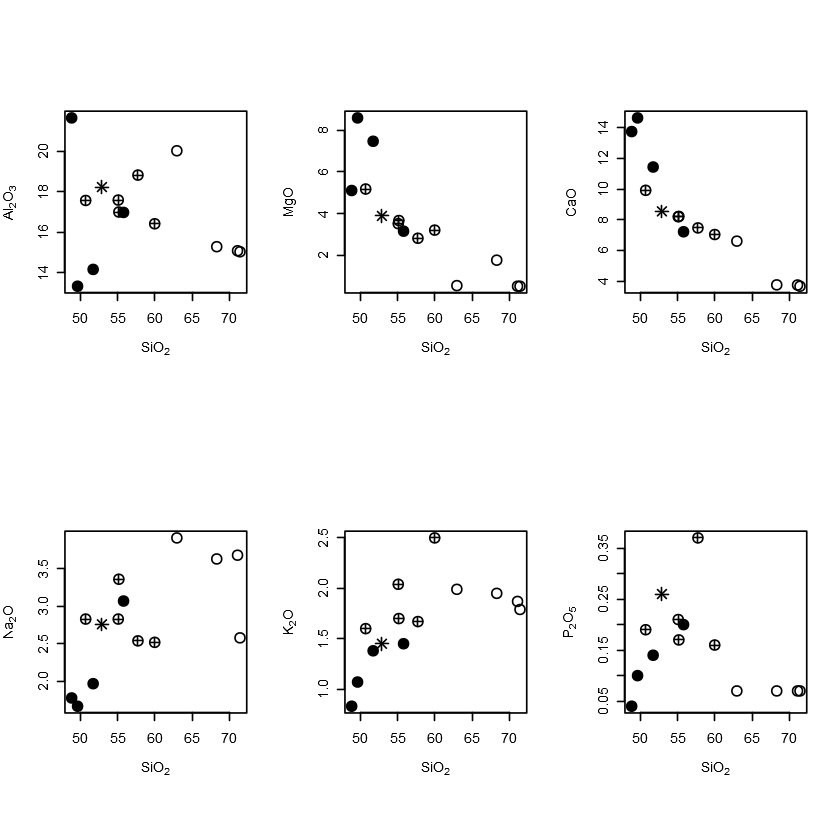

In [2]:
# Fancier version
sazava <- read.table("data/sazava.data",sep="\t")
windows(width=8,height=6)
par(mfrow=c(2,3))	# Split screen for 6 graphs
ee <- c("Al2O3","MgO","CaO","Na2O","K2O","P2O5")
lab <- c("Al[2]*O[3]","MgO","CaO","Na[2]*O","K[2]*O","P[2]*O[5]")
for(f in 1:length(ee)){
    par(pty = "s")
    plot(sazava[,"SiO2"],sazava[,ee[f]],xlab=expression(SiO[2]),ylab=parse(text=as.expression(lab[f])),pch=sazava[,"Symbol"],cex=1.5)
}

## 1.3 Spiderplots

Geochemists often like to express the compositional differences between the studied sample and given geochemical reservoir in the form of the so-called spiderplots (also known as spiderdiagrams/spidergrams or (better) multi-element diagrams). Spiderplots allow representing much of the sample’s composition on a single graph. Technically these are logarithmic plots of elemental concentrations (allowing comparison of several orders of magnitude different concentrations) in the sample divided (normalized) by those in the selected standard. The most common spiderdiagrams are chondrite-normalized REE plots.

The added value of spiderplots consists in elimination of the Oddo-Harkins effect: in the Solar System, the abundances of even-numbered elements are greater than those of neighbouring odd-numbered ones. Moreover, abundances generally decrease with increasing atomic number. Non-normalized data thus show zigzag, slightly sloped patterns. Normalized patterns (spiderplots) smooth out such differences.


<img src="images/spider_plot_derivation.png" style="width:600px;">
*Illustration of the Oddo-Harkins effect. Non-normalized patterns (ppm) for average chondrite meteorites (Boynton 1984) and the Požáry trondhjemite Po-1 from the Sázava dataset (**a—b**). **c** — Normalization to a common reference (chondrites in this case) compensates for this effect and allows focusing on differences between individual terrestrial rocks.*
 

<img src="images/exercise-icon.png" style="float:left;width:40px;height:40px;"> 
We shall write a function that will normalize REE concentrations in the sample by chondritic contents according to Boynton (1984). The normalizing data are stored in a comma-delimited file `boynton.data`. Then we will use it to calculate the normalized REE concentrations for analyses of the Sázava suite and display — using the functions `plot`, `axis`, `points` and `lines` — spiderdiagrams for trondhjemites Po-1 and Po-4. 

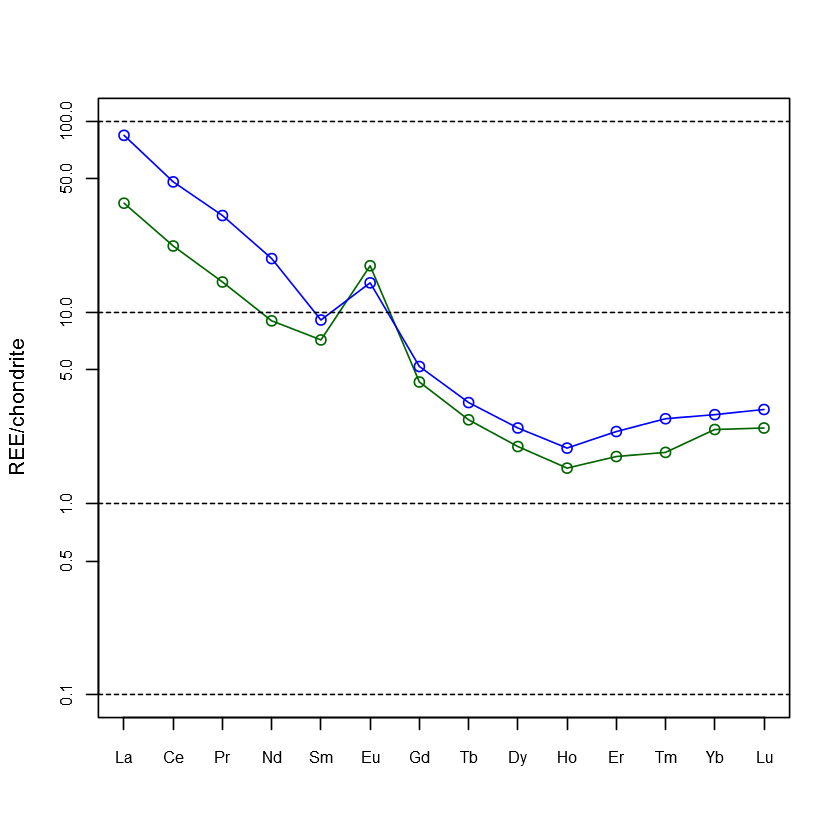

In [3]:
x <- read.table("data/boynton.data",sep=",")
chondrite <- as.numeric(x)         # conversion to numeric vector
names(chondrite) <- names(x)

norm <- function(x,chon){          # normalizing function
    z <- t(x[,names(chon)])/chon 
    return(z)
}

sazava <- read.table("data/sazava.data",sep="\t")
y <- norm(sazava,chondrite)        # normalized values

plot(y[,"Po-1"],type="o",log="y",axes=FALSE,xlab="",ylab="REE/chondrite",ylim=c(0.1,100),col="darkgreen")
axis(1,1:length(chondrite),labels=names(chondrite),cex.axis=0.75)
axis(2,cex.axis=0.75)

points(y[,"Po-4"],col="blue")
lines(y[,"Po-4"],col="blue")
abline(h=(10^(-1:3)),lty="dashed")  # grid
box()                               # bounding box

## 1.4 Ternary plots
Ternary plots rank among important and widely used geochemical tools. Setting the sides of the triangle to equating a unity, its vertices (bottom-left, top, and bottom-right) have `[x,y]` coordinates of `A[0,0]`, `B[0.5,sqrt(3)/2]` and `C[1,0]`. 

<img src="images/ternary.png" style="width:400px;">

The ternary coordinates `[a,b,c]` of a data point `X` can be transformed to binary ones `[x,y]` as follows:

$x=1-a-\frac{b}{2}$ and $y=\frac{\sqrt{3}}{2}b$.

<img src="images/exercise-icon.png" style="float:left;width:40px;height:40px;"> 
We can now use standard R functions for binary plot; the trick is that (binary) axes are not shown and triangle outline is drawn using `lines`.

First, we design a function plotting ternary diagrams and then will employ it to display a Ba–Rb–Sr ternary plot for the Sázava suite.

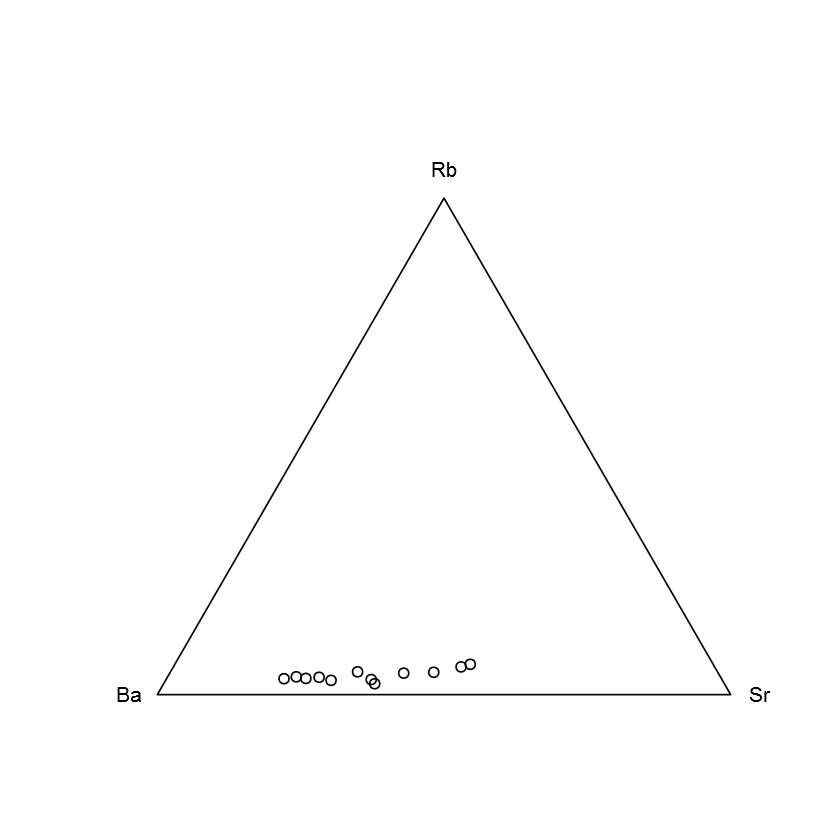

In [5]:
tri <- function(alab,blab,clab){ 
    sums <- apply(sazava[,c(alab,blab,clab)],1,sum)
    a <- sazava[,alab]/sums
    b <- sazava[,blab]/sums
    plot(1-a-b/2,sqrt(3)*b/2,xlab="",ylab="",xlim=c(0,1),ylim=c(0,1),axes=FALSE,asp=1)
    # axes=FALSE: no plotting of axes; asp: aspect ratio
    x1 <- c(0,1,.5,0)
    y1 <- c(0,0,sqrt(3)/2,0)
    lines(x1,y1)
    text(-0.05,0,alab)
    text(1.05,0,clab)
    text(0.5,sqrt(3)/2+0.05,blab)
}

sazava <- read.table("data/sazava.data",sep="\t")
tri("Ba","Rb","Sr")

#### References
Aitchison J (1986) The Statistical Analysis of Compositional Data. Methuen, New York

Bonin B (1986) Ring Complexes and Anorogenic Magmatism. Elsevier, Amsterdam

Boynton WV (1984) Cosmochemistry of the rare earth elements: meteorite studies. In: Henderson P (eds) Rare Earth Element Geochemistry. Elsevier, Amsterdam, pp 63–114

Chayes F (1960) On correlation between variables of constant sum. J Geophys Res 65:4185–4193

Harker A (1909) The natural history of igneous rocks. Methuen & Co., London

Reimann C, Filzmoser P, Garrett R, Dutter R (2008) Statistical Data Analysis Explained: Applied Environmental Statistics with R. John Wiley & Sons, Chichester

Rock NMS (1988) Numerical geology. A source guide, glossary and selective bibliography to geological uses of computers and statistics. Lecture Notes in Earth Sciences, vol 18. Springer, Berlin

Rollinson HR (1992) Another look at the constant sum problem in geochemistry. Mineral Mag 56:469–475

Skala W (1979) Some effects of the constant-sum problem in geochemistry. Chem Geol 27:1–9